In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())


'2017-10-10 15:54:12.579352'

In [2]:
import numpy as np
import matplotlib as mpl
mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

import matplotlib.pyplot as plt

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def newfig_sub(nrows, ncols,width):
    plt.clf()
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize(width), sharey=True, sharex=True)
    return fig, axes

def savefig(filename):
    plt.savefig('/Users/MarkelovIgor/Google Drive/Documents/New Vansjo Paper/latex version/img/{}.pgf'.format(filename))
    plt.savefig('/Users/MarkelovIgor/Google Drive/Documents/New Vansjo Paper/latex version/img/{}.pdf'.format(filename))
    plt.savefig('/Users/MarkelovIgor/Google Drive/Documents/New Vansjo Paper/tables and figures/img/{}.pgf'.format(filename))
    plt.savefig('/Users/MarkelovIgor/Google Drive/Documents/New Vansjo Paper/tables and figures/img/{}.pdf'.format(filename))

/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='../IO/calibrated.mat')

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


In [4]:
save_fig = False

### Calibration period

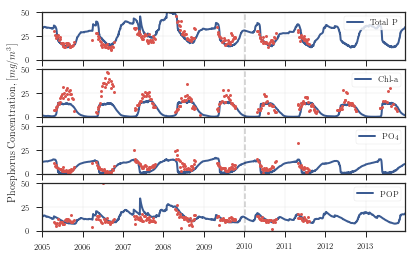

In [5]:
fig, axes = newfig_sub(4,1,1)

results = plotter.env_getter('water', basin=1)

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
axes[2].plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=2, label='POP')


TOTP = np.loadtxt('../obs/store_obs/TOTP.dat', delimiter=',')
Chl = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')
PO4 = np.loadtxt('../obs/store_obs/PO4.dat', delimiter=',')
Part = np.loadtxt('../obs/store_obs/Part.dat', delimiter=',')
axes[0].plot(-366 + TOTP[:, 0], TOTP[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)
axes[1].plot(-366 + Chl[:, 0], Chl[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)
axes[2].plot(-366 + PO4[:, 0], PO4[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)
axes[3].plot(-366 + Part[:, 0], Part[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 50])
    ax.set_xlim([732313 - 366, 735234 -10])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 50), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))    

fig.text(0.05, 0.5, r'Phosphorus Concentration, $[mg / m^3]$', va='center', rotation='vertical')

# plt.tight_layout()
if save_fig:
    savefig('calibration/Phosphorus')

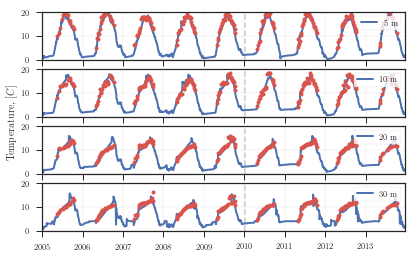

In [6]:
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):
for d, a in zip([5,10, 20, 30], axes):
    env = 'water'
    inx = np.where(results['z'][0, 0] == d)[0][0]
    y = results['T'][0, 0][inx, :]
    a.plot(-366 + results['days'][0, 0][0], y, lw=2, label=str(d) + ' m', color=None)
    a.plot_date(df[(np.isfinite(df['Temperatur'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['Temperatur'])) & (df.Depth1 == d)]['Temperatur'].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=4)

for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 20])
    ax.set_xlim([732313 - 366, 735234 -10])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 23), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Temperature, $[C]$', va='center', rotation='vertical')

if save_fig:
    savefig('calibration/Temperature')
    
    

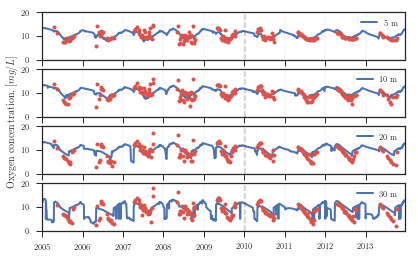

In [7]:
x = 'SampleDate'

fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):
for d, a in zip([5,10, 20, 30], axes):
    env = 'water'
    inx = np.where(results['z'][0, 0] == d)[0][0]
    y = results['concentrations'][0, 0]['O2'][0, 0][inx, :]/1000
    a.plot(-366 + results['days'][0, 0][0], y, lw=2, label=str(d) + ' m', color=None)
    a.plot_date(df[(np.isfinite(df['O2'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['O2'])) & (df.Depth1 == d)]['O2'].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=4)

for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 20])
    ax.set_xlim([732313 - 366, 735234 -10])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 23), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Oxygen concentration, $[mg/L]$', va='center', rotation='vertical')

if save_fig:
    savefig('calibration/Oxygen')

In [8]:
ice_data = pd.read_excel('Vansjo/Ice_data_Vansjø_Vanem_1994-2010.xlsx', sheetname='ice1994-2010', skiprows=0)
ice_data.Date = pd.to_datetime(ice_data.Date)
# sediment_data= sediment_data.convert_objects(convert_numeric=True)

In [9]:
import datetime
ice_data = ice_data.set_index(ice_data.Date)
ice_data.loc[ice_data['on/off'] == 'Ice-on', 'Bool'] = 1
ice_data.loc[ice_data['on/off'] == 'Ice-off', 'Bool'] = 0
ice_data['DOY'] = ice_data.index.dayofyear
ice_data.loc[(ice_data.Bool == 1) & (ice_data.DOY < 150), 'DOY'] = ice_data.DOY + 365
ice_data.loc[(ice_data.Bool == 0) & (ice_data.DOY > 150), 'DOY'] = ice_data.DOY - 365

# ice_data['Date'] = ice_data['Date'].dt.strftime('%d-%m-%Y')
# day_of_year = ice_data['Date'].tm_yday
ice_data['Date'] = pd.to_datetime(ice_data['Date'])
ice_data['date_f'] = pd.factorize(ice_data['Date'])[0] + 1
mapping = dict(zip(ice_data['date_f'], ice_data['Date'].dt.date))

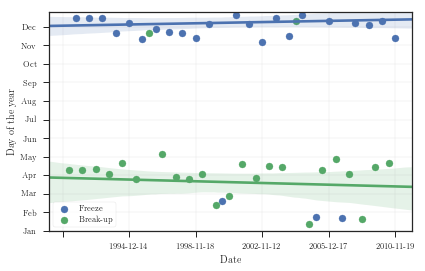

In [10]:
fig, ax = newfig(1)
ax.scatter(ice_data.date_f[ice_data.Bool==1], np.mod(ice_data.DOY[ice_data.Bool==1], 365), label='Freeze')
ax.scatter(ice_data.date_f[ice_data.Bool==0], np.mod(ice_data.DOY[ice_data.Bool==0], 365), label='Break-up')
ax.grid(linestyle='-', linewidth=0.2)
ax.legend(frameon=1)
ax = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==1], scatter=0, ax=ax)
ax = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==0], scatter=0, ax=ax)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_ylim(0, 365)
ax.set_ylabel('Day of the year')
ax.set_xlabel('Date')
ax.set_yticks(np.arange(0, 12*30.5 , 31))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'])
# ax.xaxis.set_major_locator(mdates.YearLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   

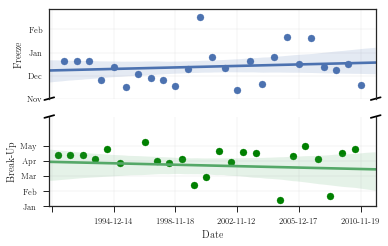

In [11]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.scatter(ice_data.date_f[ice_data.Bool==1], ice_data.DOY[ice_data.Bool==1], label='Freeze')
ax = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==1], scatter=0, ax=ax)

ax2.scatter(ice_data.date_f[ice_data.Bool==0], ice_data.DOY[ice_data.Bool==0], label='Break-up', c='g')
ax2 = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==0], scatter=0, ax=ax2)


# zoom-in / limit the view to different portions of the data
# ax.set_ylim(50, 200)  # outliers only
# ax2.set_ylim(300, 365)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_xlabel(' ')
ax.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

ax.set_yticks(np.arange(305, 425, 31))
ax.set_yticklabels(['Nov', 'Dec', 'Jan', 'Feb'])
ax2.set_yticks(np.arange(0, 5*30 , 30))
ax2.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
ax.set_ylim(305, 425)
ax2.set_ylim(0, 6*30)
ax2.set_ylabel('Break-Up')
ax.set_ylabel('Freeze')
ax2.set_xlabel('Date')
ax.tick_params(which='major', length=0)
if save_fig:
    savefig('Freeze_break')